# Capstone 2 - Baseball Stat Projections - Data Wrangling

In [111]:
#Import relevant libraries

import os
import pandas as pd
import numpy as np
import matplotlib as plt
import datetime


In [112]:
path = "/Users/joeboardman/Documents/Springboard/Capstone 2/data/"
save_path = "/Users/joeboardman/Documents/Springboard/Capstone 2/"
print(path)

/Users/joeboardman/Documents/Springboard/Capstone 2/data/


In [108]:
#create folder structure
data = os.path.join(save_path, 'data')
os.mkdir(data)

figures = os.path.join(save_path, 'figures')
os.mkdir(figures)

models = os.path.join(save_path, 'models')
os.mkdir(models)

FileExistsError: [Errno 17] File exists: '/Users/joeboardman/Documents/Springboard/Capstone 2/data'

In [167]:
#import csv files as dataframes with batting statistics and player information
os.chdir(path)
df = pd.read_csv('batting.csv')
df_player = pd.read_csv('player.csv')
df_salaries = pd.read_csv('salaries.csv')
df_position = pd.read_csv('appearances.csv')

In [168]:
#manipulate df_position so that it gives primary position per player, per year
print(df_position.shape)
df_position = df_position.iloc[:,[0,3,8,9,10,11,12,13,14,15,16,17,18]]
df_position['g_dh'] = df_position['g_dh'].fillna(0)
print(df_position.shape)
print(df_position.info())
print(df_position.head())

(100951, 21)
(100951, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100951 entries, 0 to 100950
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       100951 non-null  int64  
 1   player_id  100951 non-null  object 
 2   g_p        100951 non-null  int64  
 3   g_c        100951 non-null  int64  
 4   g_1b       100951 non-null  int64  
 5   g_2b       100951 non-null  int64  
 6   g_3b       100951 non-null  int64  
 7   g_ss       100951 non-null  int64  
 8   g_lf       100951 non-null  int64  
 9   g_cf       100951 non-null  int64  
 10  g_rf       100951 non-null  int64  
 11  g_of       100951 non-null  int64  
 12  g_dh       100951 non-null  float64
dtypes: float64(1), int64(11), object(1)
memory usage: 10.0+ MB
None
   year  player_id  g_p  g_c  g_1b  g_2b  g_3b  g_ss  g_lf  g_cf  g_rf  g_of  \
0  1871  barnero01    0    0     0    16     0    15     0     0     0     0   
1  1871  barrofr01 

In [169]:
#merge batting and position csvs to avoid duplicate rows
df = pd.merge(df, df_position, on=['player_id', 'year'])
df

,player_id,year,stint,team_id,league_id,g,ab,r,h,double,...,g_c,g_1b,g_2b,g_3b,g_ss,g_lf,g_cf,g_rf,g_of,g_dh
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0.0
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,0,0,22,0,3,0,0,0,0,0.0
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,0,0,2,0,0,0,29,0,29,0.0
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27,0,0,0,0,0,0,0,0,0.0
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,5,1,2,20,0,1,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116159,zobribe01,2015,1,OAK,AL,67,235.0,39.0,63.0,20.0,...,0,0,34,0,0,27,0,3,29,4.0
116160,zobribe01,2015,2,KCA,AL,59,232.0,37.0,66.0,16.0,...,0,0,35,4,0,18,0,2,20,2.0
116161,zobribe01,2015,2,KCA,AL,59,232.0,37.0,66.0,16.0,...,0,0,34,0,0,27,0,3,29,4.0
116162,zuninmi01,2015,1,SEA,AL,112,350.0,28.0,61.0,11.0,...,112,0,0,0,0,0,0,0,0,0.0


In [172]:
#combine records where a player played for multiple teams into one record
#df = df.groupby(['player_id', 'year'])['team_id', 'g', 'ab', 'r', 'h', 'double', 'triple', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so', 'ibb', 'hbp', 'sh', 'sf', 'g_idp'].sum().reset_index()
df = df.groupby(['player_id', 'year']).sum().reset_index()
print(df.head())
print(df.info())

   player_id  year  stint   g   ab    r    h  double  triple   hr  ...  g_c  \
0  aardsda01  2004      1  11  0.0  0.0  0.0     0.0     0.0  0.0  ...    0   
1  aardsda01  2006      1  45  2.0  0.0  0.0     0.0     0.0  0.0  ...    0   
2  aardsda01  2007      1  25  0.0  0.0  0.0     0.0     0.0  0.0  ...    0   
3  aardsda01  2008      1  47  1.0  0.0  0.0     0.0     0.0  0.0  ...    0   
4  aardsda01  2009      1  73  0.0  0.0  0.0     0.0     0.0  0.0  ...    0   

   g_1b  g_2b  g_3b  g_ss  g_lf  g_cf  g_rf  g_of  g_dh  
0     0     0     0     0     0     0     0     0   0.0  
1     0     0     0     0     0     0     0     0   0.0  
2     0     0     0     0     0     0     0     0   0.0  
3     0     0     0     0     0     0     0     0   0.0  
4     0     0     0     0     0     0     0     0   0.0  

[5 rows x 31 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93882 entries, 0 to 93881
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  

In [173]:
#merge dataframe to bring in player details, salaries etc.
#filter out seasons before 1985, at bats < 130, anybody with more than 10 pitching appearances
df = pd.merge(df, df_player, on='player_id')
df = pd.merge(df, df_salaries, on=['player_id', 'year'])
df = df[df['year'] >= 1985]
df = df[df['ab'] >= 130]
df = df[df['g_p'] < 10]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10820 entries, 15 to 24780
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   player_id      10820 non-null  object 
 1   year           10820 non-null  int64  
 2   stint          10820 non-null  int64  
 3   g              10820 non-null  int64  
 4   ab             10820 non-null  float64
 5   r              10820 non-null  float64
 6   h              10820 non-null  float64
 7   double         10820 non-null  float64
 8   triple         10820 non-null  float64
 9   hr             10820 non-null  float64
 10  rbi            10820 non-null  float64
 11  sb             10820 non-null  float64
 12  cs             10820 non-null  float64
 13  bb             10820 non-null  float64
 14  so             10820 non-null  float64
 15  ibb            10820 non-null  float64
 16  hbp            10820 non-null  float64
 17  sh             10820 non-null  float64
 18  sf   

In [177]:
#Create datetime column with birthday to be able to calculate age
df['birth_date'] = pd.to_datetime((df.birth_year*10000+df.birth_month*100+df.birth_day).apply(str),format='%Y%m%d')

In [178]:
#calculate OPS, years of service, same team
df['obp'] = (df['h'] + df['bb'] + df['hbp']) / (df['ab'] + df['bb'] + df['hbp'])
df['slg'] = ((df['h'] - (df['double'] + df['triple'] + df['hr'])) + (df['double'] * 2) + (df['triple'] * 3) + (df['hr'] * 4)) / df['ab']
df['ops'] = df['obp'] + df['slg']
print(df.head())

    player_id  year  stint    g     ab     r      h  double  triple    hr  \
15  abbotje01  1998      1   89  244.0  33.0   68.0    14.0     1.0  12.0   
17  abbotje01  2000      1   80  215.0  31.0   59.0    15.0     1.0   3.0   
29  abbotku01  1994      1  101  345.0  41.0   86.0    17.0     3.0   9.0   
30  abbotku01  1995      1  120  420.0  60.0  107.0    18.0     7.0  17.0   
31  abbotku01  1996      1  109  320.0  37.0   81.0    18.0     7.0   8.0   

    ...  final_game  retro_id   bbref_id  team_id  league_id  salary  \
15  ...  2001-09-29  abboj002  abbotje01      CHA         AL  175000   
17  ...  2001-09-29  abboj002  abbotje01      CHA         AL  255000   
29  ...  2001-04-13  abbok002  abbotku01      FLO         NL  109000   
30  ...  2001-04-13  abbok002  abbotku01      FLO         NL  119000   
31  ...  2001-04-13  abbok002  abbotku01      FLO         NL  250000   

    birth_date       obp       slg       ops  
15  1972-08-17  0.304348  0.491803  0.796151  
17  1972-0

In [179]:
#calculate season number in a player's career and age
df['year_of_career'] = (df['year'] - pd.DatetimeIndex(df['debut']).year)
df['age'] = (df['year'] - pd.DatetimeIndex(df['birth_date']).year)
print(df.head())
print(df.info())

    player_id  year  stint    g     ab     r      h  double  triple    hr  \
15  abbotje01  1998      1   89  244.0  33.0   68.0    14.0     1.0  12.0   
17  abbotje01  2000      1   80  215.0  31.0   59.0    15.0     1.0   3.0   
29  abbotku01  1994      1  101  345.0  41.0   86.0    17.0     3.0   9.0   
30  abbotku01  1995      1  120  420.0  60.0  107.0    18.0     7.0  17.0   
31  abbotku01  1996      1  109  320.0  37.0   81.0    18.0     7.0   8.0   

    ...   bbref_id  team_id  league_id  salary  birth_date       obp  \
15  ...  abbotje01      CHA         AL  175000  1972-08-17  0.304348   
17  ...  abbotje01      CHA         AL  255000  1972-08-17  0.344538   
29  ...  abbotku01      FLO         NL  109000  1969-06-02  0.292350   
30  ...  abbotku01      FLO         NL  119000  1969-06-02  0.321041   
31  ...  abbotku01      FLO         NL  250000  1969-06-02  0.307246   

         slg       ops  year_of_career  age  
15  0.491803  0.796151               1   26  
17  0.395349

In [180]:
#Delete unnecessary columns
df = df.drop(df.columns[[2,20,31,32,33,35,36,37,38,39,40,41,42,46,47,48,49,50,51,52,53,54,55,57]], axis=1)

In [181]:
#Fill NaN values in 'obp', 'slg', 'ops' columns with zeros because the errors are driven by a player 
#having 0 at bats for a season
dftest1 = df[df['obp'].isna()]
print(dftest1.head())
df['obp'] = df['obp'].fillna(0)
df['slg'] = df['slg'].fillna(0)
df['ops'] = df['ops'].fillna(0)
print(df.info())
print(df.head())

Empty DataFrame
Columns: [player_id, year, g, ab, r, h, double, triple, hr, rbi, sb, cs, bb, so, ibb, hbp, sh, sf, g_idp, g_c, g_1b, g_2b, g_3b, g_ss, g_lf, g_cf, g_rf, g_of, g_dh, birth_country, name_first, name_last, name_given, salary, obp, slg, ops, year_of_career, age]
Index: []

[0 rows x 39 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10820 entries, 15 to 24780
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player_id       10820 non-null  object 
 1   year            10820 non-null  int64  
 2   g               10820 non-null  int64  
 3   ab              10820 non-null  float64
 4   r               10820 non-null  float64
 5   h               10820 non-null  float64
 6   double          10820 non-null  float64
 7   triple          10820 non-null  float64
 8   hr              10820 non-null  float64
 9   rbi             10820 non-null  float64
 10  sb              10820 non-null  float

In [182]:
#check for duplicates
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,player_id,year,g,ab,r,h,double,triple,hr,rbi,...,birth_country,name_first,name_last,name_given,salary,obp,slg,ops,year_of_career,age
6740,figgami01,1999,86,172.0,24.0,38.0,8.0,0.0,2.0,10.0,...,USA,Mike,Figga,Michael Anthony,203650,0.238636,0.302326,0.540962,2,29
13603,maldoca01,1995,148,380.0,56.0,100.0,32.0,0.0,18.0,60.0,...,P.R.,Candy,Maldonado,Candido,200000,0.375000,0.489474,0.864474,14,35
17402,perezro01,1998,138,282.0,24.0,62.0,4.0,0.0,6.0,28.0,...,Venezuela,Robert,Perez,Robert Alexander,215000,0.236111,0.297872,0.533983,4,29
21824,tatisfe01,1998,300,1064.0,138.0,294.0,66.0,8.0,22.0,116.0,...,D.R.,Fernando,Tatis,Fernando,170000,0.329268,0.415414,0.744682,1,23


In [183]:
#Drop Duplicates
df.drop_duplicates(keep=False, inplace=True)

print(df)

       player_id  year    g     ab      r      h  double  triple    hr    rbi  \
15     abbotje01  1998   89  244.0   33.0   68.0    14.0     1.0  12.0   41.0   
17     abbotje01  2000   80  215.0   31.0   59.0    15.0     1.0   3.0   29.0   
29     abbotku01  1994  101  345.0   41.0   86.0    17.0     3.0   9.0   33.0   
30     abbotku01  1995  120  420.0   60.0  107.0    18.0     7.0  17.0   60.0   
31     abbotku01  1996  109  320.0   37.0   81.0    18.0     7.0   8.0   33.0   
...          ...   ...  ...    ...    ...    ...     ...     ...   ...    ...   
24767  zobribe01  2015  252  934.0  152.0  258.0    72.0     6.0  26.0  112.0   
24776  zuninmi01  2014  131  438.0   51.0   87.0    20.0     2.0  22.0   60.0   
24777  zuninmi01  2015  112  350.0   28.0   61.0    11.0     0.0  11.0   28.0   
24779  zupcibo01  1992  124  392.0   46.0  108.0    19.0     1.0   3.0   43.0   
24780  zupcibo01  1993  141  286.0   40.0   69.0    24.0     2.0   2.0   26.0   

       ...  birth_country  

In [184]:
#count unique values for each column
for column in df.columns:
    vals = df[column].nunique()
    print(column, vals)

player_id 1912
year 31
g 243
ab 790
r 185
h 295
double 81
triple 24
hr 77
rbi 196
sb 90
cs 35
bb 177
so 251
ibb 47
hbp 35
sh 30
sf 23
g_idp 46
g_c 186
g_1b 197
g_2b 197
g_3b 209
g_ss 199
g_lf 204
g_cf 203
g_rf 202
g_of 246
g_dh 169
birth_country 25
name_first 636
name_last 1415
name_given 1736
salary 2088
obp 7046
slg 7817
ops 10770
year_of_career 26
age 31


In [185]:
print(df.birth_country.value_counts())

USA            8209
D.R.            902
Venezuela       565
P.R.            535
Cuba            125
CAN              99
Panama           71
Japan            64
Mexico           63
Colombia         37
Jamaica          31
Curacao          30
Germany          18
South Korea      12
V.I.             11
Australia        11
Nicaragua        10
Honduras          5
France            4
Netherlands       3
Brazil            2
Aruba             2
Belize            1
Singapore         1
Belgium           1
Name: birth_country, dtype: int64


In [186]:
round(df.describe().T,0)

,count,mean,std,min,25%,50%,75%,max
year,10812.0,2000.0,9.0,1985.0,1993.0,2000.0,2008.0,2015.0
g,10812.0,126.0,46.0,34.0,95.0,126.0,150.0,528.0
ab,10812.0,414.0,187.0,130.0,264.0,412.0,539.0,1828.0
r,10812.0,57.0,32.0,4.0,31.0,52.0,77.0,264.0
h,10812.0,111.0,56.0,14.0,65.0,108.0,148.0,552.0
double,10812.0,21.0,12.0,0.0,12.0,20.0,29.0,129.0
triple,10812.0,2.0,3.0,0.0,1.0,2.0,3.0,23.0
hr,10812.0,13.0,11.0,0.0,4.0,9.0,18.0,116.0
rbi,10812.0,54.0,33.0,2.0,29.0,48.0,74.0,333.0
sb,10812.0,8.0,12.0,0.0,1.0,4.0,11.0,154.0


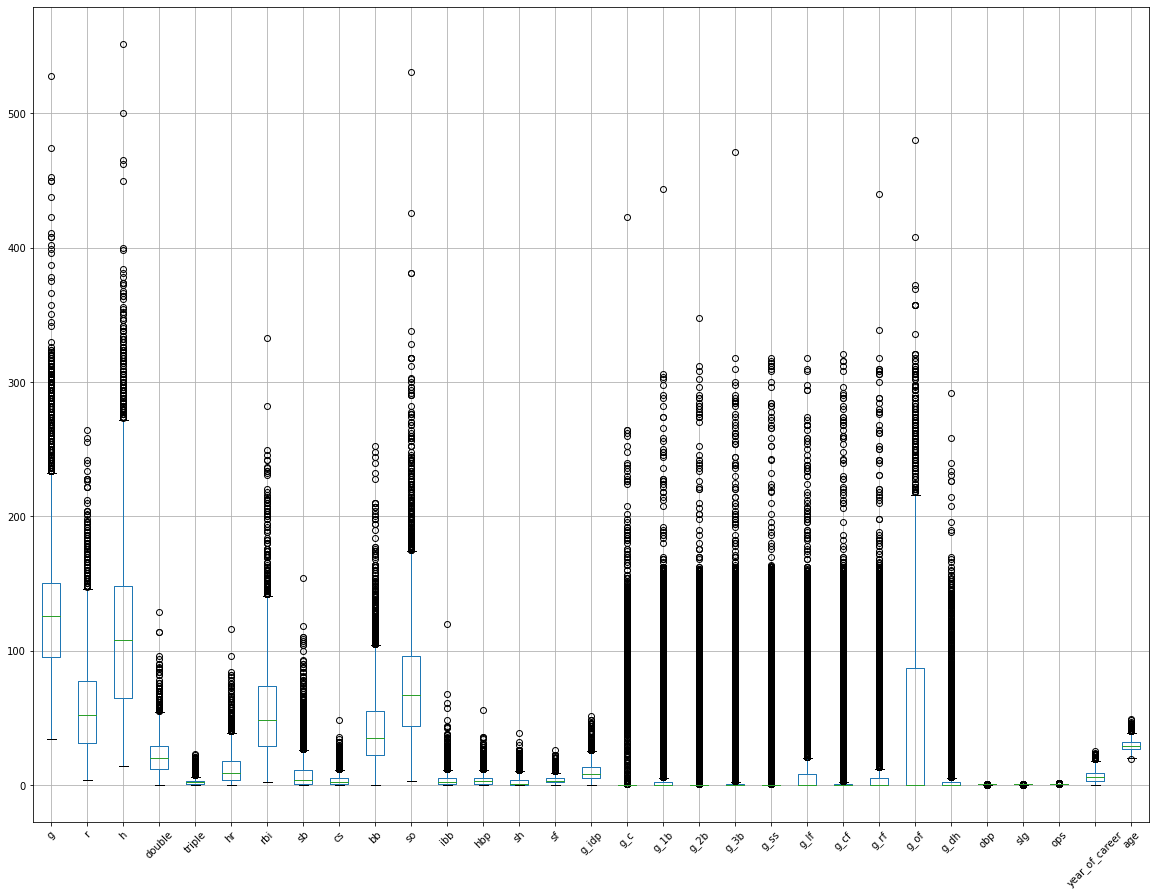

In [187]:
#Check for outliers
df_bp = df.drop(['salary', 'year', 'ab'], axis=1)
df_bp.boxplot(figsize=(20, 15), rot=45)

In [188]:
# Write your dataframe to csv 
save = os.path.join(save_path, 'data', 'Baseball_DW.csv')
df.to_csv(save)